In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics

In [2]:
# Read the csv data
flightdata = pd.read_excel('Flight_Data.xlsx')
flightdata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
flightdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
# Convert All destination city names called "New Delhi" into "Delhi"
def newd(x):
    if x=='New Delhi':
        return 'Delhi'
    else:
        return x
flightdata['Destination'] = flightdata['Destination'].apply(newd)

In [5]:
# Extract the day and time seperately from the "Date_of_Journey" column
flightdata['Day_of_Journey'] = pd.to_datetime(flightdata['Date_of_Journey'],format='%d/%m/%Y').dt.day

flightdata['Month_of_Journey'] = pd.to_datetime(flightdata['Date_of_Journey'],format='%d/%m/%Y').dt.month

flightdata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [6]:
# Drop the "Date_of_Journey" column and print first 5 rows in new dataset
flightdata.drop('Date_of_Journey',inplace=True,axis=1)

flightdata.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [7]:
# Extract the hour and minute seperately from the "Dep_Time" column and Drop the "Dep_Time" column
flightdata['Hour_of_Departure'] = pd.to_datetime(flightdata['Dep_Time']).dt.hour
flightdata['Minute_of_Departure'] = pd.to_datetime(flightdata['Dep_Time']).dt.minute
flightdata.drop('Dep_Time',axis=1,inplace=True)

# Extract the hour and minute seperately from the "Arrival_Time" column and Drop the "Arrival_Time" column
flightdata['Hour_of_Arrival'] = pd.to_datetime(flightdata['Arrival_Time']).dt.hour
flightdata['Minute_of_Arrival'] = pd.to_datetime(flightdata['Arrival_Time']).dt.minute
flightdata.drop('Arrival_Time',axis=1,inplace=True)

# print first 5 rows in new dataset
flightdata.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Hour_of_Departure,Minute_of_Departure,Hour_of_Arrival,Minute_of_Arrival
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [8]:
# Extract the hours and minutes from the "Duration" column and Drop the "Duration" column
flightduration = list(flightdata['Duration'])
for x in range(len(flightduration)):
    if len(flightduration[x].split()) != 2:
        if 'h' in flightduration[x]:
            flightduration[x] = flightduration[x] + ' 0m'
        else:
            flightduration[x] = '0h ' + flightduration[x]
            
duration_hour = []
duration_min = []

for x in flightduration:
    h,m = x.split()
    duration_hour.append(int(h[:-1]))
    duration_min.append(int(m[:-1]))
    
flightdata['Hours_of_Duration'] = duration_hour
flightdata['Mints_of_Duration'] = duration_min
flightdata.drop('Duration',axis=1,inplace=True)
flightdata.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Hour_of_Departure,Minute_of_Departure,Hour_of_Arrival,Minute_of_Arrival,Hours_of_Duration,Mints_of_Duration
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Categorical Data Handling ###

In [9]:
flightdata["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

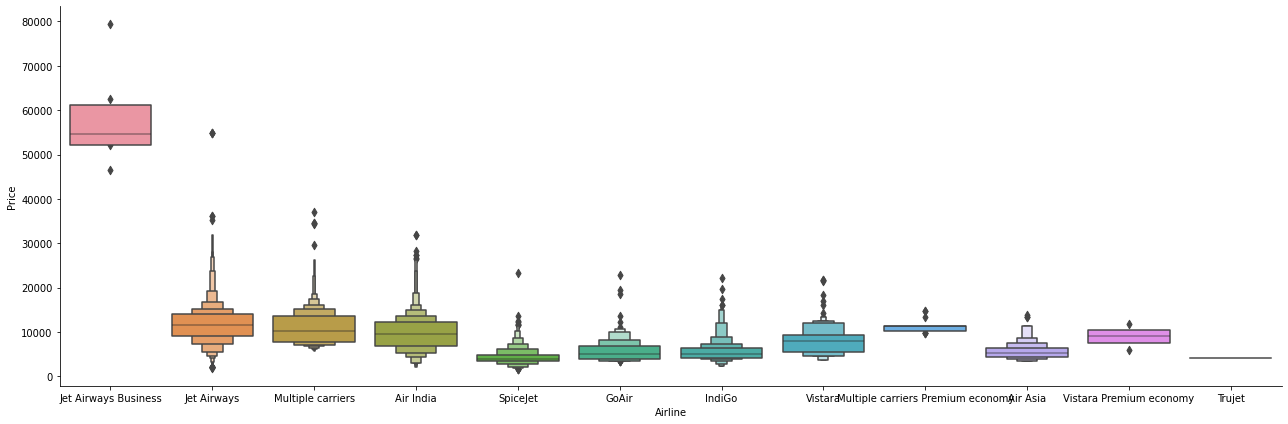

In [10]:
# From graph we can see that Jet Airways Business have the highest Price. 

# Airline vs Price

sns.catplot(y = "Price", x = "Airline", data = flightdata.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [11]:
# Creating dummy columns out of the Airline column.
airlineServices = pd.get_dummies(flightdata[['Airline']])

airlineServices.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [12]:
flightdata["Source"].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

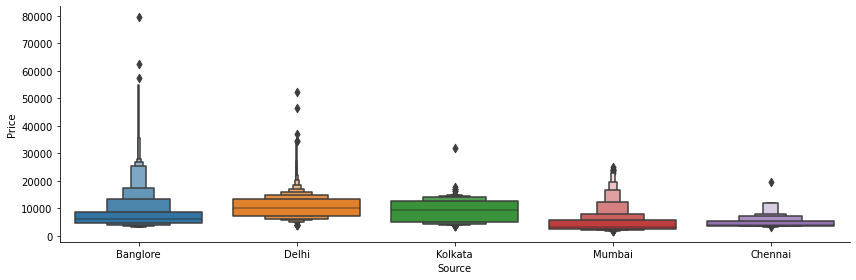

In [13]:
# Source vs Price Graph

sns.catplot(y = "Price", x = "Source", data = flightdata.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)

plt.show()

In [14]:
# Creating dummy columns for Source Airports.
sourceAirports = pd.get_dummies(flightdata[['Source']])

sourceAirports.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [15]:
flightdata["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

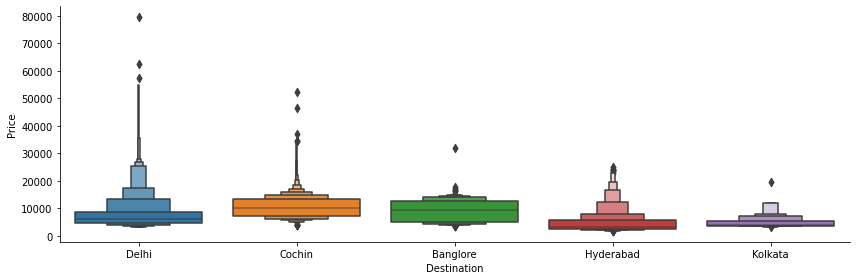

In [16]:
# Destination vs Price Graph

sns.catplot(y = "Price", x = "Destination", data = flightdata.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)

plt.show()

In [17]:
# Creating dummy columns for Destination.
destinationAirports = pd.get_dummies(flightdata[['Destination']])
destinationAirports.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,0,1,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0


In [18]:
# Drop unnecessary Columns
flightdata.drop(['Route','Additional_Info'],inplace=True,axis=1)
flightdata.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Hour_of_Departure,Minute_of_Departure,Hour_of_Arrival,Minute_of_Arrival,Hours_of_Duration,Mints_of_Duration
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [19]:
flightdata["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [20]:
def give_numerical_values_to_totalStops(stops):
    if stops=='non-stop':
        return 0
    elif stops=='1 stop':
        return 1
    elif stops=='2 stops':
        return 2
    elif stops=='3 stops':
        return 3
    elif stops=='4 stops':
        return 4
    
flightdata['Total_Stops'] = flightdata['Total_Stops'].apply(give_numerical_values_to_totalStops)

In [21]:
flightdata.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Hour_of_Departure,Minute_of_Departure,Hour_of_Arrival,Minute_of_Arrival,Hours_of_Duration,Mints_of_Duration
0,IndiGo,Banglore,Delhi,0.0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1.0,13302,1,3,16,50,21,35,4,45


In [22]:
# Convert data type of Total_Stops from float to integer

flightdata['Total_Stops'] = flightdata['Total_Stops'].fillna(0).astype(np.int64)
flightdata.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Hour_of_Departure,Minute_of_Departure,Hour_of_Arrival,Minute_of_Arrival,Hours_of_Duration,Mints_of_Duration
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,35,4,45


In [23]:
# Concatenate dataframe --> flightdata + Airline + Source + Destination

data2 = pd.concat([flightdata, airlineServices,sourceAirports, destinationAirports],axis=1)

data2.drop(['Airline','Source','Destination'],axis=1,inplace=True)

data2.head()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Hour_of_Departure,Minute_of_Departure,Hour_of_Arrival,Minute_of_Arrival,Hours_of_Duration,Mints_of_Duration,...,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,1,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,1,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,1,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,1,0,0,0,0,0,0,1,0,0


In [24]:
data2.shape

(10683, 32)

## Test Dataset ##

In [25]:
test_flightdata = pd.read_excel("Test_Data.xlsx")
test_flightdata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


#### Preprocessing ####

In [26]:
# Preprocessing

print("---------------Test data Info----------------")
print(test_flightdata.info())

print()

print("--------------Null values :--------------")
test_flightdata.dropna(inplace = True)
print(test_flightdata.isnull().sum())

---------------Test data Info----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None

--------------Null values :--------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype:

In [27]:
# Convert All destination city names called "New Delhi" into "Delhi"
def newd(x):
    if x=='New Delhi':
        return 'Delhi'
    else:
        return x
test_flightdata['Destination'] = test_flightdata['Destination'].apply(newd)

# Date_of_Journey
test_flightdata["Day_of_Journey"] = pd.to_datetime(test_flightdata["Date_of_Journey"], format="%d/%m/%Y").dt.day
test_flightdata["Month_of_Journey"] = pd.to_datetime(test_flightdata["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_flightdata.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_flightdata["Hour_of_Departure"] = pd.to_datetime(test_flightdata["Dep_Time"]).dt.hour
test_flightdata["Minute_of_Departure"] = pd.to_datetime(test_flightdata["Dep_Time"]).dt.minute
test_flightdata.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_flightdata["Hour_of_Arrival"] = pd.to_datetime(test_flightdata.Arrival_Time).dt.hour
test_flightdata["Minute_of_Arrival"] = pd.to_datetime(test_flightdata.Arrival_Time).dt.minute
test_flightdata.drop(["Arrival_Time"], axis = 1, inplace = True)


In [28]:
# Duration
flightduration = list(test_flightdata['Duration'])
for x in range(len(flightduration)):
    if len(flightduration[x].split()) != 2:
        if 'h' in flightduration[x]:
            flightduration[x] = flightduration[x] + ' 0m'
        else:
            flightduration[x] = '0h ' + flightduration[x]
            
duration_hour = []
duration_min = []

for x in flightduration:
    h,m = x.split()
    duration_hour.append(int(h[:-1]))
    duration_min.append(int(m[:-1]))
    
test_flightdata['Hours_of_Duration'] = duration_hour
test_flightdata['Mints_of_Duration'] = duration_min
test_flightdata.drop('Duration',axis=1,inplace=True)

In [29]:
# Categorical data

print("------------Airline-----------")
print(test_flightdata["Airline"].value_counts())
airlineServices = pd.get_dummies(test_flightdata[["Airline"]], drop_first= True)

print()

print("-----------Source-----------")
print(test_flightdata["Source"].value_counts())
sourceAirports = pd.get_dummies(test_flightdata[["Source"]], drop_first= True)

print()

print("-----------Destination-----------")
print(test_flightdata["Destination"].value_counts())
destinationAirports = pd.get_dummies(test_flightdata[["Destination"]], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_flightdata.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

------------Airline-----------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

-----------Source-----------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

-----------Destination-----------
Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [30]:
# Replacing Total_Stops
def give_numerical_values_to_totalStops(stops):
    if stops=='non-stop':
        return 0
    elif stops=='1 stop':
        return 1
    elif stops=='2 stops':
        return 2
    elif stops=='3 stops':
        return 3
    elif stops=='4 stops':
        return 4
    
test_flightdata['Total_Stops'] = test_flightdata['Total_Stops'].apply(give_numerical_values_to_totalStops)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data3 = pd.concat([test_flightdata, airlineServices, sourceAirports, destinationAirports], axis = 1)

data3.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print("Shape of test data : ", data3.shape)

Shape of test data :  (2671, 27)


In [31]:
data3.head()

,Total_Stops,Day_of_Journey,Month_of_Journey,Hour_of_Departure,Minute_of_Departure,Hour_of_Arrival,Minute_of_Arrival,Hours_of_Duration,Mints_of_Duration,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1,6,6,17,30,4,25,10,55,0,...,0,0,0,1,0,0,1,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,0,1,0,0,1,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,0,1,0,0


#### Selecting Features ####

In [32]:
data2.shape

(10683, 32)

In [33]:
data2.columns

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Hour_of_Departure', 'Minute_of_Departure', 'Hour_of_Arrival',
       'Minute_of_Arrival', 'Hours_of_Duration', 'Mints_of_Duration',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata'],
      dtype='object')

In [34]:
X = data2.loc[:, ['Total_Stops', 'Day_of_Journey', 'Month_of_Journey',
       'Hour_of_Departure', 'Minute_of_Departure', 'Hour_of_Arrival',
       'Minute_of_Arrival', 'Hours_of_Duration', 'Mints_of_Duration',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
X.head()

,Total_Stops,Day_of_Journey,Month_of_Journey,Hour_of_Departure,Minute_of_Departure,Hour_of_Arrival,Minute_of_Arrival,Hours_of_Duration,Mints_of_Duration,Airline_Air Asia,...,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,...,1,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,0,...,0,0,0,1,0,1,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,1,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,1,0,0,0,0,0,0,1,0,0


In [35]:
y = data2.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

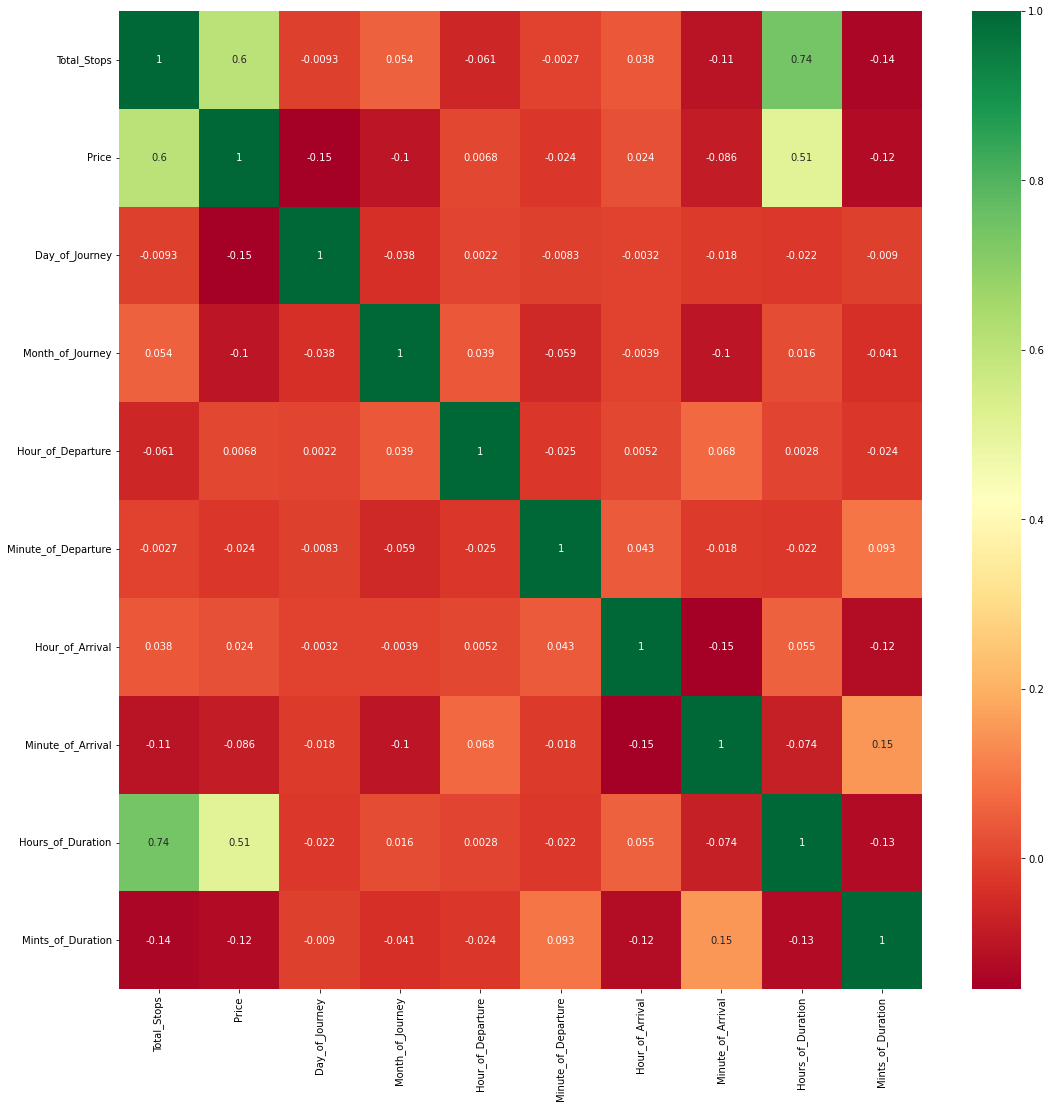

In [36]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(flightdata.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [37]:
# Important feature using ExtraTreesRegressor to fits a number of randomized decision trees

selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [38]:
print(selection.feature_importances_)

[2.33050626e-01 1.44460012e-01 5.74852894e-02 2.42952869e-02
 2.09980045e-02 2.80054085e-02 1.85937985e-02 1.13005378e-01
 1.77792274e-02 2.29164279e-03 9.68349078e-03 1.87347645e-03
 1.87856358e-02 1.44464683e-01 6.73183786e-02 1.79598680e-02
 8.21351772e-04 5.07272661e-03 9.65874243e-05 4.55191967e-03
 7.47649920e-05 9.17723177e-03 6.52364910e-04 1.24004166e-02
 2.44673206e-03 1.06895881e-02 2.79473150e-03 1.13965463e-02
 1.06252695e-02 8.53581261e-03 6.13749498e-04]


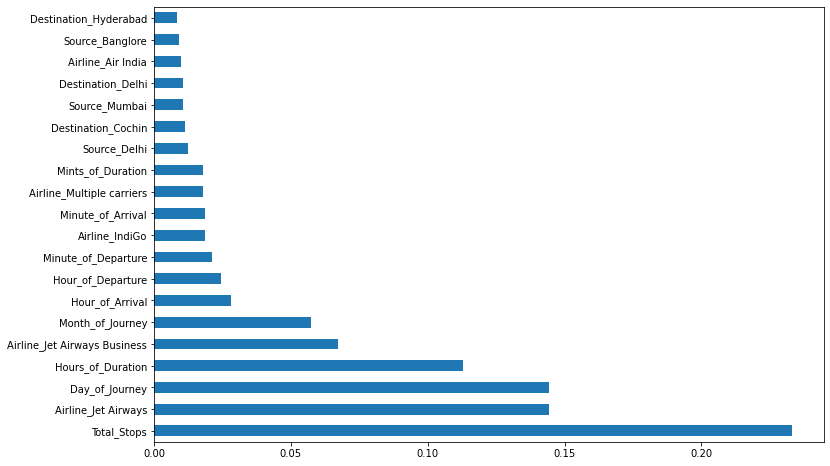

In [39]:
#Graph vizualization of feature importances

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

#### Random Forest -  Fitting the model ####

In [40]:
# Split dataset into train and test set in order to prediction 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
# Import model and Fit the data 

randomfreg = RandomForestRegressor()
randomfreg.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
y_pred = randomfreg.predict(X_test)

In [43]:
print("Score in training set : " , randomfreg.score(X_train, y_train) * 100 , "%")

Score in training set :  95.46656299964312 %


In [44]:
print("Score in training set : " , randomfreg.score(X_test, y_test) * 100 , "%")

Score in training set :  78.41070818587411 %


C:\Users\MSI BRAVO 15\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


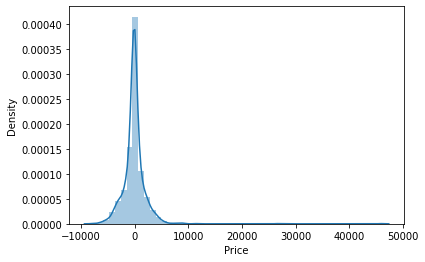

In [45]:
sns.distplot(y_test-y_pred)
plt.show()

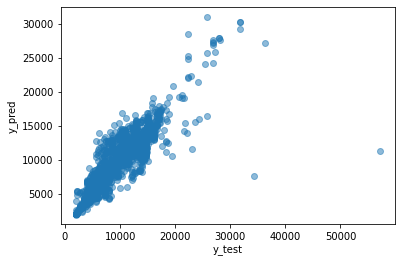

In [46]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [47]:
print('R2 score: ', metrics.r2_score(y_test,y_pred))
print('Mean Absolute Error score:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error score:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error score:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score:  0.7841070818587411
Mean Absolute Error score: 1196.8953270613856
Mean Squared Error score: 4569150.391203318
Root Mean Squared Error score: 2137.557108290517


In [48]:
# RMSE/(max(DV)-min(DV))

2129.275476571236/(max(y)-min(y))

0.02738512310227562

## Hyperparameter Tuning ##

In [49]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
randomf_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [50]:
# Random search of parameters, using 5 fold cross validation, 
random_search = RandomizedSearchCV(estimator = randomfreg, param_distributions = randomf_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [51]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [52]:
random_search.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [53]:
predictionData = random_search.predict(X_test)

C:\Users\MSI BRAVO 15\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


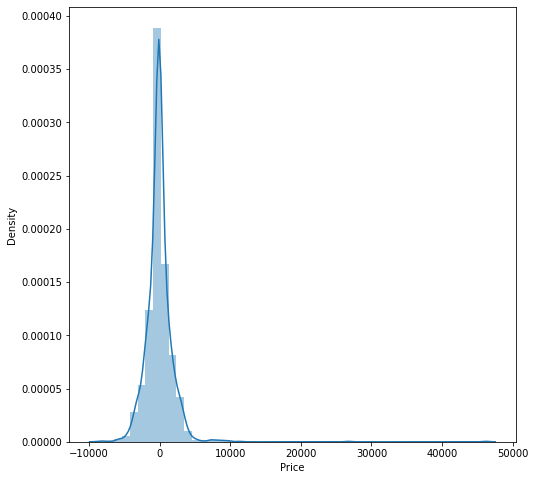

In [54]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-predictionData)
plt.show()

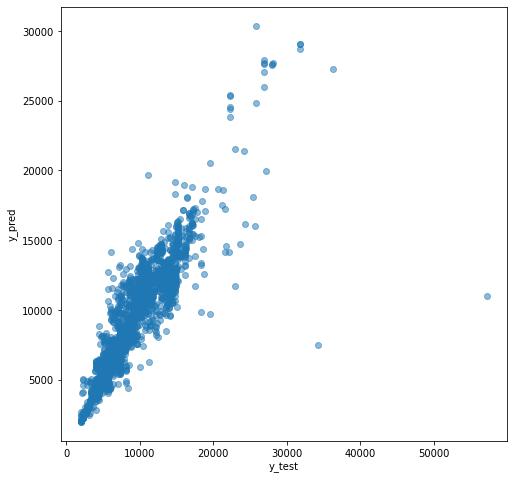

In [55]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, predictionData, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [56]:
print('R2 score: ', metrics.r2_score(y_test,predictionData))
print('Mean Absolute Error score:', metrics.mean_absolute_error(y_test, predictionData))
print('Mean Squared Error score:', metrics.mean_squared_error(y_test, predictionData))
print('Root Mean Squared Error score:', np.sqrt(metrics.mean_squared_error(y_test, predictionData)))

R2 score:  0.8017922187061811
Mean Absolute Error score: 1167.9075248266754
Mean Squared Error score: 4194862.755274042
Root Mean Squared Error score: 2048.1364103189126


In [57]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':predictionData})
df

,Actual,Predicted
6076,10844,13221.044117
3544,4959,6188.296906
7313,14781,12523.018142
5032,3858,3677.428969
2483,12898,14616.898332
...,...,...
9797,7408,11026.962446
9871,4622,5246.169042
10063,7452,6868.802020
7623,4823,4821.747348


In [57]:
import datetime

def predictedfare(flightdata):
    airline = flightdata[0]
    journey = flightdata[1]
    departuretime = flightdata[2]
    arrivaltime = flightdata[3]
    source = flightdata[4]
    destination = flightdata[5]
    duration = flightdata[6]
    totalstops = flightdata[7]
    
    if airline=='IndiGo' and source=='Kolkata' and destination=='Banglore':
        flightdata=np.array([[np.int(totalstops), datetime.datetime.strptime(journey, "%d/%m/%Y").day, 
                              datetime.datetime.strptime(journey, "%d/%m/%Y").month, 
                              datetime.datetime.strptime(departuretime, "%H:%M").hour, 
                              datetime.datetime.strptime(departuretime, "%H:%M").minute, 
                              datetime.datetime.strptime(arrivaltime, "%H:%M").hour, 
                              datetime.datetime.strptime(arrivaltime, "%H:%M").minute,
                              datetime.datetime.strptime(duration, "%H:%M").hour, 
                              datetime.datetime.strptime(duration, "%H:%M").minute,
                              0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                              0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])
        

        
    predFare = random_search.predict(flightdata)
    return (predFare[0])

your_details = ['IndiGo', '24/03/2012', '23:20', '12:10', 'Kolkata', 'Banglore' , '5:50' , 2]
print("The Predicted Fare is --> $" , predictedfare(your_details))

if predictedfare(your_details) > df["Actual"].mean() :
    print("Recommendation --> You can buy this ticket Now. Prices are in normal range.")
    
else:
    print("Recommendation --> Please wait. Ticket prices will be decreased.")


The Predicted Fare is --> $ 8039.035579004797
Recommendation --> Please wait. Ticket prices will be decreased.


C:\Users\MSIBRA~1\AppData\Local\Temp/ipykernel_7404/2214599386.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  flightdata=np.array([[np.int(totalstops), datetime.datetime.strptime(journey, "%d/%m/%Y").day,
C:\Users\MSI BRAVO 15\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\MSIBRA~1\AppData\Local\Temp/ipykernel_7404/2214599386.py:14: DeprecationWarning: `np.int` is a deprecated alias for the 

C:\Users\MSI BRAVO 15\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\MSI BRAVO 15\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


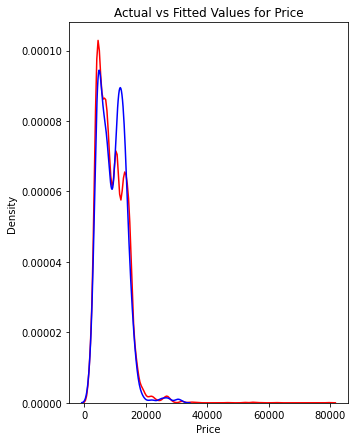

In [139]:
flightdata = flightdata.select_dtypes(exclude=['object'])
flightdata=flightdata.fillna(flightdata.mean())
y = flightdata['Price']

plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Price Values")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()